In [1]:
#https://pypi.org/project/pyEDFlib/
import sys, os

In [2]:
sys.path.append(os.path.realpath("/home/saqibm128/miniconda3/envs/keras/lib/python3.7/site-packages"))

In [3]:
import pandas as pd
import numpy as np
import pyedflib as edf
import matplotlib.pyplot as plt
import time

In [4]:
def io_task(a):
    os.mkdir("{}".format(a))
    os.rmdir("{}".format(a))
io_task(1)

In [5]:
from pathos.multiprocessing import ProcessPool as Pool

In [6]:
p = Pool(6)
start = time.time()
a = list(range(10000))
d = p.map(io_task, a)
print(time.time() - start)
print("done")
start = time.time()
d = [io_task(x) for x in a]
print(time.time() - start)
print("done")
len(a)

16.790846824645996
done
12.724885702133179
done


10000

In [7]:
start = time.time()
d = [x**2 for x in a]
print(time.time() - start)
print("done")


0.013421058654785156
done


# Sample files
Mostly looking at what names of signals are, what data is exposed, etc.

## 01_tcp_ar
Average ref. The label names are showing that it is the name of the electrode with respect to a REF voltage.

In [8]:
testfile = "/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf"

In [9]:
reader0 = edf.EdfReader(testfile)

In [10]:
labels = reader0.getSignalHeaders()
labels

[{'label': 'EEG FP1-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG FP2-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F3-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F4-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG C3

## 02_tcp_le
Linked Ear Reference. The label names show that the voltage is with respect to the linked ear electrodes.

In [11]:
testfile = "/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002/s001_2002_12_23/00000002_s001_t000.edf"

In [12]:
reader = edf.EdfReader(testfile)

In [13]:
labels = reader.getSignalHeaders()
labels

[{'label': 'EEG FP1-LE',
  'dimension': 'uV',
  'sample_rate': 250,
  'physical_max': 4999.85,
  'physical_min': -4999.85,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': ''},
 {'label': 'EEG FP2-LE',
  'dimension': 'uV',
  'sample_rate': 250,
  'physical_max': 4999.85,
  'physical_min': -4999.85,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': ''},
 {'label': 'EEG F3-LE',
  'dimension': 'uV',
  'sample_rate': 250,
  'physical_max': 4999.85,
  'physical_min': -4999.85,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': ''},
 {'label': 'EEG F4-LE',
  'dimension': 'uV',
  'sample_rate': 250,
  'physical_max': 4999.85,
  'physical_min': -4999.85,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': ''},
 {'label': 'EEG C3-LE',
  'dimension':

In [14]:
len(labels)

33

In [15]:
n = reader.signals_in_file
n

33

In [16]:
np.isnan(reader.readSignal(1).shape).any()

False

In [17]:
reader.readSignal(2)

array([ 26.85548265,  16.78467666,  22.88819544, ..., -44.86086306,
       -36.6211127 , -19.83643605])

In [18]:
np.isnan(reader.readSignal(3)).any()

False

## 03_tcp_ar_a
Appears similar to 01_tcp_ar but is in different directory for some reason?
May need to investigate

In [19]:
testfile = "/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/03_tcp_ar_a/022/00002297/s003_2007_10_23/00002297_s003_t000.edf"

In [20]:
reader1 = edf.EdfReader(testfile)

In [21]:
labels = reader1.getSignalHeaders()
labels

[{'label': 'EEG FP1-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG FP2-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F3-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F4-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG C3

In [22]:
len(labels)

32

# Setting up read function

In [23]:
root_dir_path = "/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/"

In [24]:
import os.path as path
subdirs = os.listdir(root_dir_path)
subdirs = [path.join(root_dir_path, subdir) for subdir in subdirs]
subdirs[0:5]

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/001',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/002',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/003',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/004']

In [25]:
def get_abs_files(root_dir_path):
    """
    helper func to return full path names. helps with nested structure of
        extracted files
    """
    subdirs = os.listdir(root_dir_path)
    subdirs = [path.join(root_dir_path, subdir) for subdir in subdirs]
    return subdirs

In [26]:
subdirs = get_abs_files(root_dir_path)

In [27]:
subsubdirs = get_abs_files(subdirs[0])
subsubdirs

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000017',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000021',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000032',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000054',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000077']

In [28]:
get_abs_files(subsubdirs[0])

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002/s001_2002_12_23',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002/s002_2002_12_23',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002/s004_2002_12_26',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/000/00000002/s005_2002_12_27']

In [29]:
import itertools
import os.path as path

subpaths = list(itertools.chain.from_iterable([os.listdir(path.join(root_dir_path, subdir)) for subdir in subdirs]))
fullpaths = list([root_dir_path])

In [30]:
from importlib import reload

In [31]:
import util_funcs
import itertools
reload(util_funcs)
import data_reader as read
reload(read)

<module 'data_reader' from '/mnt/c/Users/sawer/src/dbmi/dbmi_eeg_clustering/data_reader.py'>

In [32]:
pat_dir_names = read.get_patient_dir_names("dev_test", "01_tcp_ar", full_path=False)
pat_dir_names[0:5]

['00000258', '00000629', '00001027', '00001278', '00002289']

In [33]:
session_dir_names = read.get_session_dir_names("dev_test", "01_tcp_ar")
session_dir_names[0:5]

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s003_2003_07_22',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/006/00000629/s003_2003_07_23',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/006/00000629/s004_2003_07_24',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/010/00001027/s003_2004_01_29']

In [34]:
filepaths = util_funcs.get_abs_files(session_dir_names[0])
filepaths

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002.txt',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.lbl',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.lbl_bi',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.tse',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.tse_bi',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.lbl',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/0

In [35]:
reader2 = edf.EdfReader(filepaths[6])


In [36]:
reader2.getSignalHeaders()

[{'label': 'EEG FP1-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG FP2-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F3-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F4-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG C3

In [37]:
reader2.getStartdatetime()

datetime.datetime(2003, 7, 21, 17, 13, 15)

In [38]:
reader0.getSignalHeaders()

[{'label': 'EEG FP1-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG FP2-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F3-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG F4-REF',
  'dimension': 'uV',
  'sample_rate': 400,
  'physical_max': 29483.12,
  'physical_min': -29483.1,
  'digital_max': 32767,
  'digital_min': -32767,
  'prefilter': 'HP:-1.000 Hz LP:-2.0 Hz N:0.0',
  'transducer': 'EEG'},
 {'label': 'EEG C3

In [39]:
reader0.getStartdatetime()

datetime.datetime(2003, 7, 21, 17, 12, 54)

In [40]:
read.get_token_file_names("/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/")

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf',
 '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf']

In [41]:
%%bash
ls /mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/

s002_2003_07_21
s003_2003_07_22


In [42]:
session_dir = '/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s003_2003_07_22'

In [43]:
readers = [edf.EdfReader(fn) for fn in read.get_token_file_names(session_dir)]

In [44]:
[reader.file_duration for reader in readers]

[234, 224, 203, 205, 175, 309]

In [45]:
[reader.getStartdatetime() for reader in readers]

[datetime.datetime(2003, 7, 22, 6, 46, 8),
 datetime.datetime(2003, 8, 12, 0, 0),
 datetime.datetime(2003, 8, 12, 0, 0),
 datetime.datetime(2003, 8, 12, 0, 0),
 datetime.datetime(2003, 8, 12, 0, 0),
 datetime.datetime(2003, 8, 12, 0, 0)]

In [46]:
session_dirs = read.get_session_dir_names(data_split='train', ref='02_tcp_le')

In [47]:
session_dir_random = session_dirs[160]
print(read.get_token_file_names(session_dir_random))
readers = [edf.EdfReader(fn) for fn in read.get_token_file_names(session_dir_random)]
print([reader.file_duration for reader in readers])
print([reader.file_duration/reader.getSignalHeader(0)['sample_rate'] for reader in readers])
print([reader.getStartdatetime() for reader in readers])

['/mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/train/02_tcp_le/028/00002881/s001_2006_04_21/00002881_s001_t000.edf']
[1262]
[5.048]
[datetime.datetime(2006, 4, 21, 10, 35, 9)]


In [48]:
readers = [] #closes the file resource by removing the reference

In [49]:
pd.Series([len(read.get_token_file_names(session_dir)) for session_dir in session_dirs]).value_counts()

1     254
2      36
3       8
4       6
7       4
8       3
19      1
11      1
10      1
9       1
6       1
5       1
dtype: int64

In [50]:
session_dirs = read.get_session_dir_names(data_split='dev_test', ref='01_tcp_ar')
reader = None #closes files
readers = []
sample_rates = []
eeg_lengths = []
for session_dir in session_dirs:
    for token_fn in read.get_token_file_names(session_dir):
        reader = edf.EdfReader(token_fn)
        sample_rates.append(reader.getSignalHeader(0)['sample_rate'])
        eeg_lengths.append(reader.readSignal(0).shape[0]/ reader.getSignalHeader(0)['sample_rate'])
sample_rates

OSError: file has already been opened

In [ ]:
plt.hist(pd.Series(eeg_lengths)/60)
plt.title("Distribution of Token File Length (dev_test fold, 01_tcp_ar)")
plt.xlabel("t (minutes)")
plt.ylabel("Number of EEGs")

In [ ]:
reader.readSignal(0).shape[0]

In [ ]:
token_fns = read.get_all_token_file_names('dev_test', '01_tcp_ar')

In [ ]:
token_fns[0]

In [ ]:
len(token_fns)

In [ ]:
%%bash
ls /mnt/c/Users/sawer/src/dbmi/tuh/v1.5.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/

In [ ]:
reload(util_funcs)
ann_y = read.read_tse_file(token_fns[0][:-4] + ".tse")
data_x = read.edf_eeg_2_df(token_fns[0])

In [ ]:
data_x.index = data_x.index -  data_x.index[0] 
data_x.resample(pd.Timedelta(seconds=1/250)).ffill()

In [ ]:
ann_y_t.loc[pd.Timedelta(seconds=0)]

In [ ]:
ann_y_t = pd.DataFrame(columns=util_funcs.get_annotation_types(), index=data_x.index)
ann_y.apply(lambda row: ann_y_t[row['label']].loc[pd.Timedelta(seconds=row['start']):pd.Timedelta(seconds=row['end'])].fillna(row['p'], inplace=True), axis=1)
ann_y_t.fillna(0, inplace=True)

# FFT and Numpy

In [51]:
import numpy as np


In [52]:
sp = np.fft.fft([np.sin(i * 2 * np.pi * 0.1) for i in range(1000)] + [np.sin(i * 4 * np.pi * 0.1) for i in range(1000)] + [np.sin(i * 6 * np.pi * 0.1) for i in range(1000)])
freq = np.fft.fftfreq(sp.shape[-1], d=0.1)

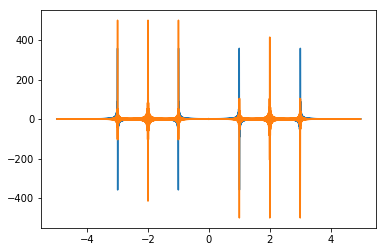

In [53]:
plt.plot(freq, sp.real, freq, sp.imag)

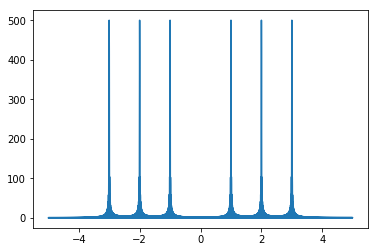

In [54]:
plt.plot(freq, np.abs(sp))

In [ ]:
fft = pd.Series(sp.imag, index=freq)

In [ ]:
fft[fft == fft.max()]

In [ ]:
sp.real.max()

# Running some sample code with data_reader and util_funcs

In [121]:
import data_reader as read
import util_funcs
from importlib import reload
reload(util_funcs)
reload(read)

<module 'data_reader' from '/mnt/c/Users/sawer/src/dbmi/dbmi_eeg_clustering/data_reader.py'>

In [110]:
edfData = read.EdfDataset("dev_test", "01_tcp_ar", num_files=20)

In [11]:
edfData = edfData[0:20]

In [20]:
import numpy as np

In [122]:
edfFFTData = read.EdfFFTDatasetTransformer(edfData, window_size=pd.Timedelta(seconds=0.5))

In [123]:
data0 = edfFFTData[0]

In [129]:
data0[1].shape

(5120, 27)

In [131]:
5120-4993

127

In [56]:
def np_rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [62]:
pd.Timedelta(seconds=1) / pd.Timedelta(seconds=1/256)

256.0163850486431

In [91]:
COMMON_FREQ=1/256
fft_data = np.abs(np.fft.fft(np_rolling_window(np.array(edfData[0][0].T), 20), axis=2))
fft_freq_bins = list(range(100))



In [92]:
fft_freq = np.fft.fftfreq(fft_data.shape[2], d=COMMON_FREQ)
fft_data.shape

(32, 5101, 20)

In [94]:
new_hist_bins = np.zeros((fft_data.shape[0], fft_data.shape[1], len(fft_freq_bins) - 1))
for i, channel in enumerate(fft_data):
    for j, window_channel in enumerate(channel):
        new_hist_bins[i, j, :] = np.histogram(fft_freq, bins=fft_freq_bins, weights=window_channel)[0]
        

In [97]:
new_hist_bins

array([[[ 269.234391  ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 244.04053499,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 235.94250984,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        ...,
        [ 279.63175787,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 272.43351329,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 263.43570757,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]],

       [[1031.34853542,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 982.76038453,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [ 947.66894223,    0.        ,    0.        , ...,
            0.